In [7]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import numpy as np

In [8]:
def update(t, vectors, ax, ax_limits=None, colors=None):
    ax.clear()  # Clear the previous frame

    vectors_rot = vectors.copy()
    vectors_rot[0,1]=vectors_rot[0,1] + 0*t
    for i in range(1, len(vectors)):
      vectors_rot[i,1]=vectors_rot[i,1] + i*t

    plot_vectors(vectors_rot, ax, ax_limits, colors)

    return ax.get_children()

In [9]:
def plot_vectors(vectors, ax, ax_limits=None, colors=None):
    # Initialize the current endpoint
    current_endpoint = (0, 0)

    for length, angle in vectors:
        # Convert angle to radians
        theta = np.radians(angle)

        # Calculate the endpoint of the current vector
        endpoint = (current_endpoint[0] + length * np.cos(theta), current_endpoint[1] + length * np.sin(theta))

        ax.quiver(*current_endpoint, endpoint[0] - current_endpoint[0], endpoint[1] - current_endpoint[1],
                  angles='xy', scale_units='xy', scale=1, color='b')

        circle = plt.Circle(current_endpoint, length, color='b', fill=False, linestyle='dotted', linewidth=0.5)
        ax.add_patch(circle)

        # Update the current endpoint for the next vector
        current_endpoint = endpoint

    # Set axis limits based on the vectors
    if ax_limits is None:
        ax_limits = [-1 * max([abs(current_endpoint[0]), abs(current_endpoint[1])]),
                     max([abs(current_endpoint[0]), abs(current_endpoint[1])])]
        print(ax_limits)
    ax.set_xlim([ax_limits[0], ax_limits[1]])
    ax.set_ylim([ax_limits[0], ax_limits[1]])

    # Set labels and title
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_title('Vector Plot with Circles')

    # Show the grid
    ax.grid(True)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_aspect('equal', adjustable='box')

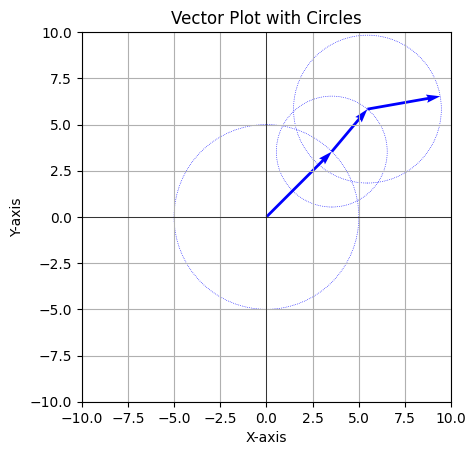

In [11]:
# Example usage with vector lengths and angles:
vectors = np.array([(5, 45), (3, 60), (4, 30)])  # length, angle
ax_limits = [-10, 10]
colors = None

# Set up the animation
fig, ax = plt.subplots()
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 10), fargs=(vectors, ax, ax_limits, colors), blit=True)

# Display the animation in Jupyter notebook
HTML(ani.to_jshtml())
